In [ ]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.rcParams["font.family"] = 'Malgun Gothic'

# 12장 파이썬 모델링 라이브러리
* 모델 fitting
* 모델 scoring
* 데이터 cleaning
* 모델링 도구
  * statsmodels
    * https://www.statsmodels.org/stable/index.html
  * scikit-learn(사이킷런)
    * https://scikit-learn.org/stable

## 12.1 판다스와 모델 코드의 인터페이스
* 학습 모델링 개발 과정

1. 데이터 로딩: 판다스를 사용하여 데이터를 로드하고 데이터프레임으로 변환

2. 데이터 전처리: 판다스를 사용하여 데이터를 전처리
  * 피처 엔지니어링(feature engineering)

3. 데이터셋 분리
    
3. 모델 훈련: 판다스 데이터프레임을 모델 훈련에 사용

4. 모델 평가: 판다스를 사용하여 모델 성능을 평가

5. 모델 예측: 판다스 데이터프레임을 사용하여 모델 예측


* feature engineering
    * 기계 학습 모델의 성능을 향상시키기 위해 데이터의 원시 특징을 변환하는 프로세스
    * 데이터를 더욱 정보량이 풍부하고 예측하기 쉽게 만드는 데 도움이 도움이 됨.
    * 피처 엔지니어링 기술
      * 결측값 처리: 결측값은 모델 성능에 부정적인 영향을 줌
        * 결측값을 평균, 중앙값 또는 최빈값으로 대체
        * 결측값을 포함하는 행을 삭제
        * 결측값을 예측하는 모델을 훈련
     
      * 이상치 처리: 이상치는 모델 성능에 부정적인 영향을 줌
          * 이상치를 처리하는 방법
              * 이상치를 제거
              * 이상치를 변환
              * 이상치를 예측하는 모델을 훈련

      * 피처 스케일링: 피처 스케일링은 모든 피처가 동일한 범위에 있도록 보장하는 프로세스
        * 모델이 모든 피처에 동일한 가중치를 부여하는 데 도움
        * 피처 스케일링 기술
          * 표준화: -1과 1사이에 속하도록 표준화. 피처의 평균을 0으로, 표준 편차를 1로 조정
          * 정규화: 피처의 값이 0과 1 사이에 있도록 조정

      * 피처 변환: 피처 변환은 피처의 분포를 변경하는 프로세스
        * 이는 모델이 피처 간의 관계를 더 잘 학습하는 데 도움
        * 피처 변환 기술
          * 로그 변환: 피처의 값을 로그로 변환
          * 제곱근 변환: 피처의 값을 제곱근으로 변환

      * 피처 선택: 피처 선택은 모델 학습에 사용할 피처를 선택하는 프로세스
        * 이는 모델의 성능을 향상시키고 과적합을 줄이는 데 도움이 됨
        * 피처 선택 기술
          * 상관 관계 분석: 독립 변수 간 상관 관계가 높은 피처를 제거
          * 통계적 유의성 검정: 통계적으로 유의미하지 않은 피처를 제거
          * 머신 러닝 알고리즘: 피처 중요도를 평가하는 머신 러닝 알고리즘을 사용하여 피처를 선택

      * 피처 생성: 피처 생성은 새로운 피처를 만드는 프로세스
        * 이는 모델이 데이터의 패턴을 더 잘 학습하는 데 도움
        * 피처 생성 기술
          * 교차 피처: 기존 피처를 결합하여 새로운 피처를 생성
          * 주성분 분석: 기존 피처의 주성분을 추출하여 새로운 피처를 생성
  

## 교차 검증(Cross-validation)
* 교차 검증은 머신러닝 모델의 성능을 평가하는 방법 중 하나
* 교차 검증은 데이터셋을 여러 개의 폴드(fold)로 나누고, 각 폴드를 한 번씩 평가 데이터로 사용하는 방법
* 예를 들어, 데이터셋을 5개의 폴드로 나누고 교차 검증을 사용하여 모델의 성능을 평가하면 다음과 같다.
  * 데이터셋을 5개의 폴드로 나눈다
  * 첫 번째 폴드를 평가 데이터로 사용하고, 나머지 4개의 폴드를 학습 데이터로 사용하여 모델을 훈련시킨다.
  * 훈련된 모델을 사용하여 평가 데이터에 대한 예측을 만든다.
  * 예측과 실제 값을 비교하여 모델의 성능을 평가함
  * 두 번째 폴드를 평가 데이터로 사용하고, 나머지 4개의 폴드를 학습 데이터로 사용하여 모델을 훈련시킴.
  * 훈련된 모델을 사용하여 평가 데이터에 대한 예측을 만든다. 예측과 실제 값을 비교하여 모델의 성능을 평가한다.
  * 이 과정을 모든 폴드에 대해 반복한다.

* 교차 검증은 다음과 같은 장점이 있다.
  1) 모델의 성능을 정확하게 평가할 수 있다.
  2) 과적합을 방지할 수 있다.
  3) 하이퍼파라미터 튜닝에 사용할 수 있다.

* 교차 검증은 다음과 같은 단점이 있다.
  * 시간이 오래 걸린다.
  * 계산 자원이 많이 필요



### [문제] 회귀분석 문제(Next class)
* scikit-learn 패키지을 사용하여 가상의 회귀분석 문제 이해하기
* from sklearn import linear_model


* Python에서 scikit-learn을 사용하여 선형 회귀를 구현:

  * 필요한 라이브러리 임포트
  * 데이터 준비
  * 데이터 분리
  * 모델 학습
  * 모델 평가

[Method 1] 단순 선형회귀 구현 : LinearRegression 클래스에 경사하강법과 학습 원리가 구현됨

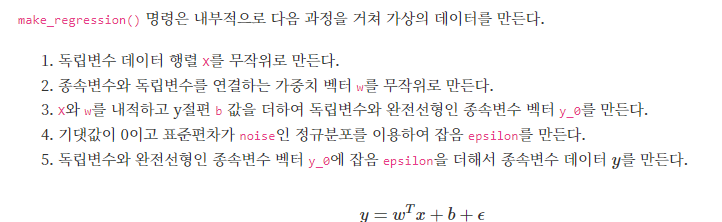

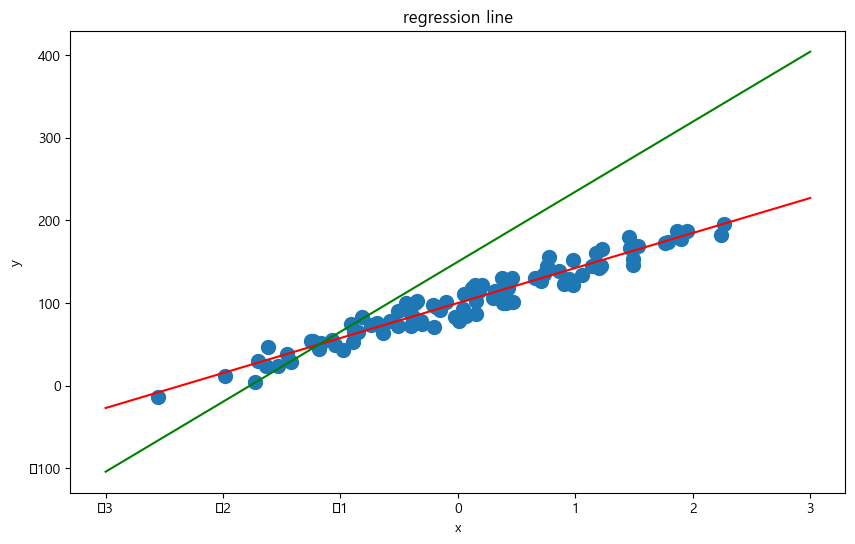

훈련 데이터의 성능:
R^2 : 0.9411102712377214
MSE : 114.08793884781785
테스트 데이터의 성능:
R^2 : 0.9437320687923872
MSE : 114.83418502778855


C:\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


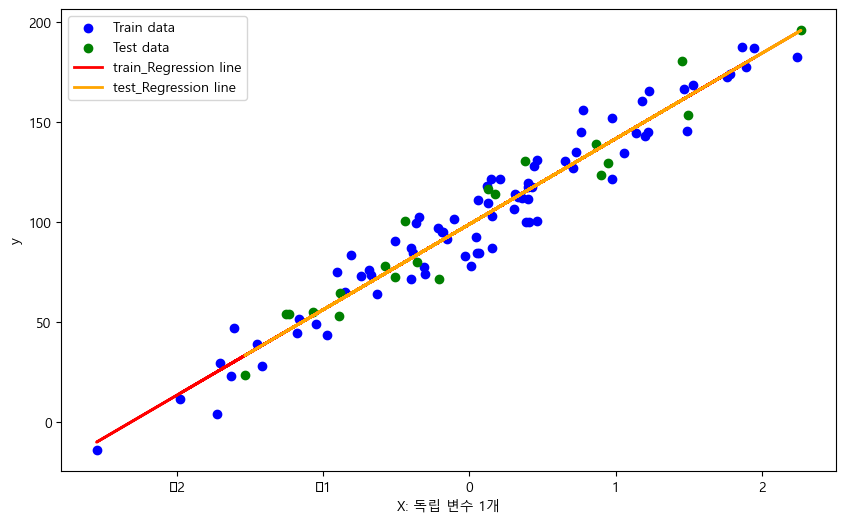

Coef:= [42.66264537], Intercept := 98.93063741326712
 y := [42.66264537] *X +  98.93063741326712 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# 1. 데이터 생성
X, y, w = make_regression(
    n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=0 )
# 데이터 분포
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100 # 임의의 1차 함수 : 직선
y1 = (w*2) * xx + 150

plt.plot(xx, y0, color = "r")
plt.plot(xx, y1, color = "g")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression line")
plt.show()
# 2. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# 3. 모델 선택
model = LinearRegression()

# 4. 모델 학습 : 학습용 데이터
model.fit(X_train, y_train)

# 4. 학습모델을 이용하여 평가 데이터을 넣어 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 5. 선형 회귀 모델 성능 평가
print("훈련 데이터의 성능:")
print(f"R^2 : {r2_score(y_train, y_train_pred)}")
print(f"MSE : {mean_squared_error(y_train, y_train_pred)}")

print("테스트 데이터의 성능:")
print(f"R^2 : {r2_score(y_test, y_test_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_test_pred)}")

# 6. 시각화
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='train_Regression line')
plt.plot(X_test, y_test_pred, color='orange', linewidth=2, label='test_Regression line')
plt.xlabel('X: 독립 변수 1개')
plt.ylabel('y')
plt.legend()
plt.show()

#7. 최적 선형회귀선
print(f"Coef:= {model.coef_}, Intercept := {model.intercept_}")
print(f" y := {model.coef_} *X +  {model.intercept_} ")

#### [Method 2] 경사하강법을 이용하여 선형회귀함수의 가중치와 절편을 구하기 :
  * 하이퍼파라미터:
    * 학습율
    * 가중치
    * 바이어스
    * 에폭 : 학습을 위해서 전체 데이터를 모두 넣어서 에러를 구하는데 이렇게 전체 데이터를 한 번 사용하는 것을 1 epoch


W =  4.7544940675401634e-15 , b= 101.73480172190618 , error= [[ 21.69068733 -19.60497099  -9.82209286 ... -10.04966397  54.49965098
   57.15483243]
 [ 21.69068733 -19.60497099  -9.82209286 ... -10.04966397  54.49965098
   57.15483243]
 [ 21.69068733 -19.60497099  -9.82209286 ... -10.04966397  54.49965098
   57.15483243]
 ...
 [ 21.69068733 -19.60497099  -9.82209286 ... -10.04966397  54.49965098
   57.15483243]
 [ 21.69068733 -19.60497099  -9.82209286 ... -10.04966397  54.49965098
   57.15483243]
 [ 21.69068733 -19.60497099  -9.82209286 ... -10.04966397  54.49965098
   57.15483243]]


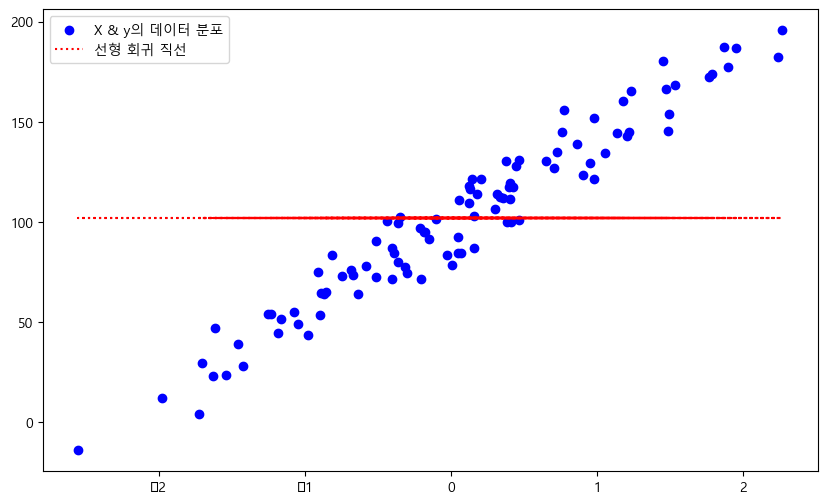

In [ ]:
# LinearRegression 사용하지 않고 학습율을 매우 작게 줄 경우
# 하이퍼파라미터 튜닝(2)
w, b = 0, 0
eta , epoch  = 0.00001, 1000 # 학습율과 학습횟수

# 경사하강법 구현
for i in range(epoch):
    y_pred = w*X + b # 선형 회귀 선 (1차함수 )
    error = y_pred - y
    w =  w - eta* (error * X).sum()
    b = b - eta* error.sum()
    # print(f"Epoch =:  {i}, W =: { w.round(2)}, b=: { b.round(2)}, error =: {error.round(2)}")

print('W = ', w, ', b=', b, ', error=', error)

# 시각화
plt.scatter(X, y, color = 'blue', label="X & y의 데이터 분포")
y_pred = w* X + b # 계산으로 구한 가중치와 절편을 이용하여 선형회귀 직선을 그리기
plt.plot(X, y_pred, 'r:', label = "선형 회귀 직선")
plt.legend()


W =  nan , b= nan , error= [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\user\AppData\Local\Temp\ipykernel_2836\2657551136.py:7: RuntimeWarning: overflow encountered in multiply
  y_pred = w*X + b # 선형 회귀 선 (1차함수 )
C:\Users\user\AppData\Local\Temp\ipykernel_2836\2657551136.py:7: RuntimeWarning: overflow encountered in add
  y_pred = w*X + b # 선형 회귀 선 (1차함수 )
C:\Users\user\AppData\Local\Temp\ipykernel_2836\2657551136.py:9: RuntimeWarning: overflow encountered in multiply
  w =  w - eta* (error * X).sum()
C:\Python39\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Python39\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


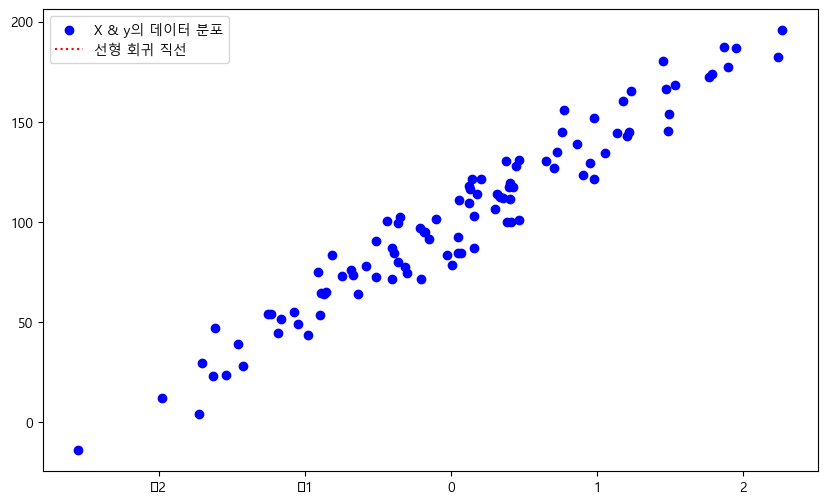

In [ ]:
# LinearRegression 사용하지 않고 학습율을 매우 크게 줄 경우
# 하이퍼파라미터 튜닝
w, b = 0, 0
eta , epoch  = 1.0, 1000 # 학습율과 학습횟수
# 경사하강법 구현
for i in range(epoch):
    y_pred = w*X + b # 선형 회귀 선 (1차함수 )
    error = y_pred - y
    w =  w - eta* (error * X).sum()
    b = b - eta* error.sum()
    # print(f"Epoch =:  {i}, W =: { w.round(2)}, b=: { b.round(2)}, error =: {error.round(2)}")

print('W = ', w, ', b=', b, ', error=', error)

# 시각화
plt.scatter(X, y, color = 'blue', label="X & y의 데이터 분포")
y_pred = w* X + b # 계산으로 구한 가중치와 절편을 이용하여 선형회귀 직선을 그리기
plt.plot(X, y_pred, 'r:', label = "선형 회귀 직선")
plt.legend()



## [심화 프로그래밍 : LinearRegression]
* 선형 회귀 모델을 사용하여 Seaborn의 데이터셋에서 연도와 항공기 승객 수 사이의 상관관계를 분석하고, 모델의 계수와 절편을 구한 후, 예측 점수를 출력하고 결과를 시각화하는 코드를 작성
* 독립변수가 2개 이상



In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# flights 데이터셋 로드
flights = sns.load_dataset("flights")

# flights 데이터셋의 정보 출력
print(flights.info())

# flights 데이터셋의 상위 5행 출력
print(flights.head())
print(flights.describe())

# flights 데이터 셋의 shape을 출력
print(flights.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000
(144, 3)


(1) flights의 groupby() 기능과 sum()메서드를 사용하여 다음과 같이 연도별 이용객의 수를 출력하시오.

In [ ]:
result = flights.groupby(['year'])['passengers'].sum()
result
# type(result)

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

(2) 연도 값을 X축으로 하고, 연간 승객의 수를 y축으로 하여 다음과 같은 선 그래프를 그리시오.

Text(0.5, 1.0, 'Line chart : Total Passengers per Year')

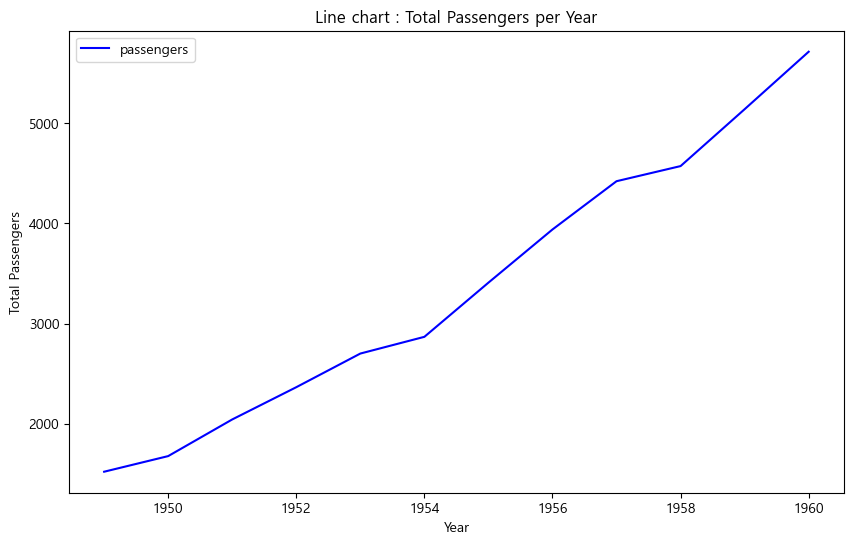

In [ ]:
# 1) X  축 : 연도 값
X = result.index
# 2)  y축 : 연간 승객의 수
y = result.values  #  values ====  numpy ndarray, df.to_numpy()
#  시각화
plt.plot(X, y, color='blue', label='passengers')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Line chart : Total Passengers per Year")

(3) 연도별 항공기 승객의 증가 추이를 scatter()을 이용하여 시각화하여라

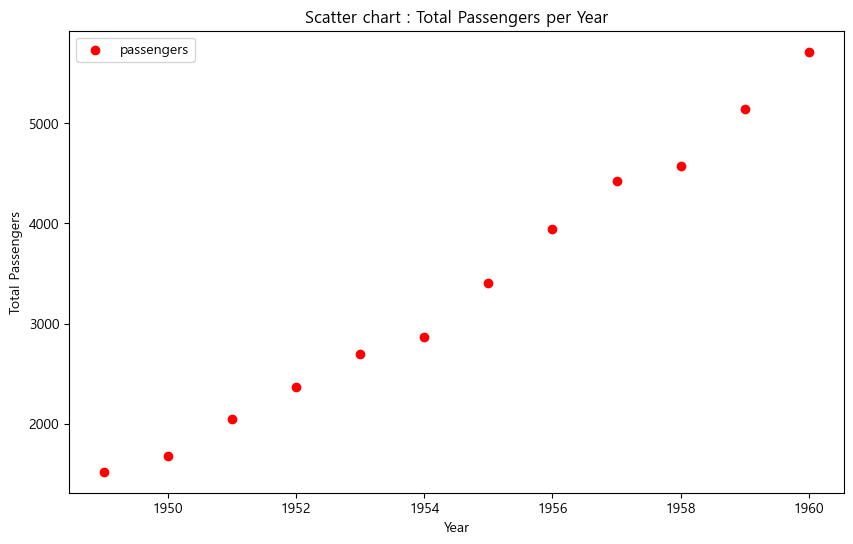

In [ ]:
plt.scatter(X, y, label = "passengers", color = "red") # 데이터 분포을 시각화
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Scatter chart : Total Passengers per Year")
plt.legend()

(4) 연도와 항공기 승객의 수 사이에는 상관관계을 선형회귀 분석으로 모델링하시오.
  * 선형회귀분석을 통해서 선형회귀모델의 계수와 절편을 구하기.
  * 이 선형회귀모델이 입력값(연도)에 대하여 항공기 승객의 수를 예측하는데 얼마나 적합한지 예측점수를 출력

In [ ]:
type(X.values), X.values.shape

(numpy.ndarray, (12,))

In [ ]:
# 1.
from sklearn import linear_model
# 2.
model = linear_model.LinearRegression()
# 3.
X = result.index
X.shape #(12,)
X = X.values.reshape(-1, 1) # 1차원 벡터  -> 2차원 배열
model.fit(X, y)

# 4.
print(f"w = {model.coef_}, b = {model.intercept_}, score ={model.score(X,y).round(2)}")

w = [383.08741259], b = -745380.7645687643, score =0.99


(5) 산점도 그래프와 선형회귀직선을 다음과 같이 한 그래프위에 표시하시오

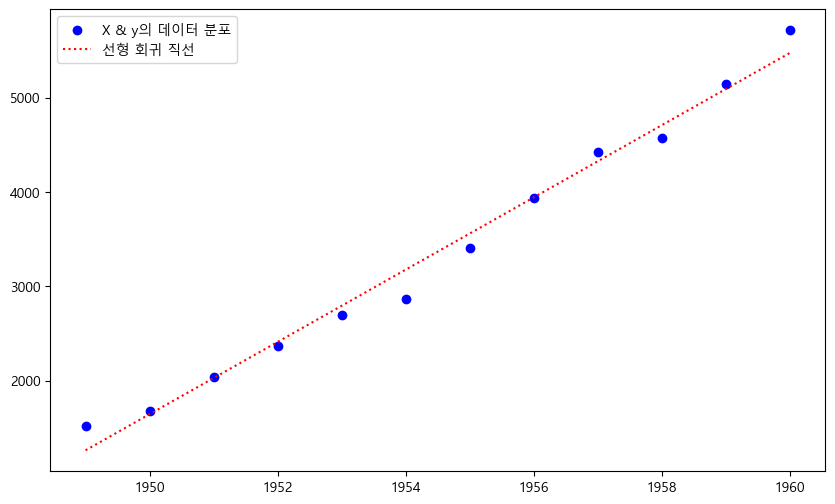

In [ ]:
# 우리가 구한 가설함수의 가중치와 절편이 데이터의 분포를 제대로 설명하는가 시각화해서 분석하기


(7) 예측 모델의 성능 평가을 하시오

In [ ]:
# 1.
y_pred = model.predict(X)
# 2.
r2 = r2_score(y, y_pred)
r = model.score(X, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"r2={r2}, mse={mse}, r={r}")


r2=0.9866055381778157, mse=23742.81866744399, r=1.0


array([[28455.80885781]])

(8) 2020년에 기대하는 승객의 수를 예측하시오.

In [ ]:
# 3.
y = model.coef_*[[2020]] + model.intercept_
print(y)

[[28455.80885781]]


## [ 심화 프로그래밍 : SGDRegressor]

Model_1 coefficient: [0.89912666]
Model_1 intercept: [0.00010348]
R-squared: 0.977740640205514
Mean Squared Error: 39456.60156189011


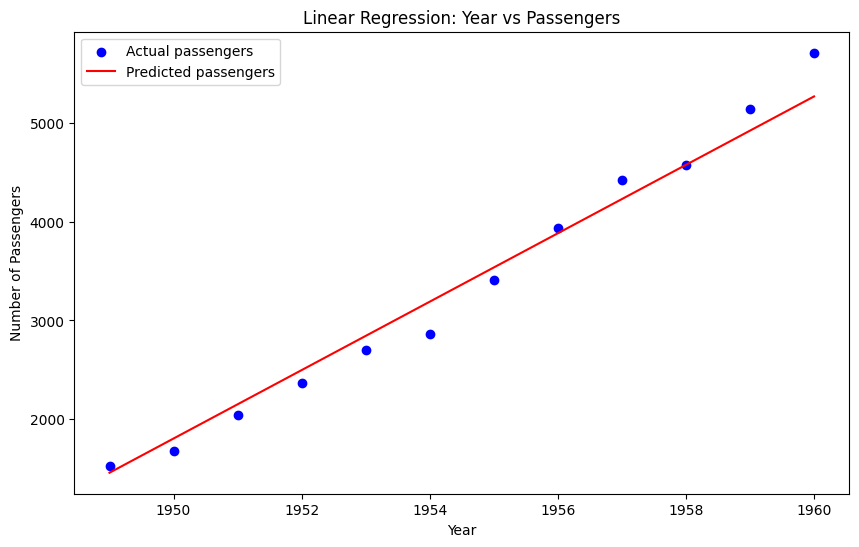

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor, LinearRegression , Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler # 예측 성능 개선

# 1. 데이터 로드
flights = sns.load_dataset('flights')

# 2. 데이터 전처리
# 연도병별 승객 수를 추출
result = flights.groupby(['year'])['passengers'].sum()

# 3. X, y 정의
X = result.index.to_numpy().reshape(-1,1)
y = result.values.reshape(-1,1)

# 4. 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y).ravel()


# 5. 선형 회귀 모델 정의
model_1 = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.005)
model_baseline = LinearRegression()

# 5. 모델 학습
model_1.fit(X_scaled, y_scaled)
model_baseline.fit(X_scaled, y_scaled)

# 6. 모델 계수와 절편 출력
print(f"Model_1 coefficient: {model_1.coef_}")
print(f"Model_1 intercept: {model_1.intercept_}")


# 7. 예측
y_pred_scaled = model_1.predict(X_scaled)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # 예측된 값을 역표준화하여 원래 스케일로 변환

# 8. 평가 점수 출력
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# 9. 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual passengers')
plt.plot(X, y_pred, color='red', label='Predicted passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Linear Regression: Year vs Passengers')
plt.legend()
plt.show()